In [3]:
from google.colab import drive

In [5]:
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import cv2
from sklearn.model_selection import train_test_split
import pickle
import os
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt

In [23]:
TRAINING_DIR = '/content/gdrive/MyDrive/DATASET/IMAGE/boat_type_classification_ai_challenge-dataset/TRAIN/'
TESTING_DIR = '/content/gdrive/MyDrive/DATASET/IMAGE/boat_type_classification_ai_challenge-dataset/test/'

# Image Distribution

In [192]:
folders = os.listdir(TRAINING_DIR)
print("Total Classes Detected:", len(folders))

label = []
imgCount = []

for folder in folders:
    label.append(folder) 
    pic_list = os.listdir(TRAINING_DIR + "/" + folder)
    imgCount.append(len(pic_list))
    

print(label)
print(imgCount)

Total Classes Detected: 9
['cruise_ship', 'gondola', 'kayak', 'sailboat', 'paper_boat', 'freight_boat', 'inflatable_boat', 'ferry_boat', 'buoy']
[191, 193, 203, 389, 31, 23, 16, 63, 53]


<BarContainer object of 9 artists>

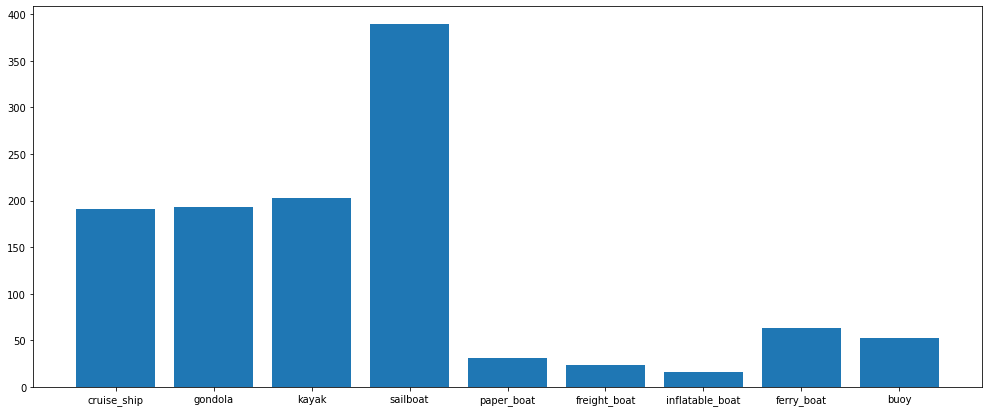

In [199]:
plt.figure(figsize=(17, 7))
plt.bar(label, imgCount)

In [ ]:
#Display Sample Imges
num_of_samples = []
cols = 5
num_classes = no_of_folders
fig, axs = plt.subplots(nrows = num_classes, ncols = cols, figsize = (5, 300))
fig.tight_layout()
for i in range(cols):
    for j, row in data.iterrows():
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected)- 1), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j)+ "-"+row["Name"])
            num_of_samples.append(len(x_selected))
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()'''

In [180]:
train_datagen = ImageDataGenerator(rescale=1 / 255, 
                                   width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  zoom_range=0.2,  # 0.2 MEANS CAN GO FROM 0.8 TO 1.2
                                  shear_range=0.1,  # MAGNITUDE OF SHEAR ANGLE
                                  rotation_range=10,
                                  validation_split=0.25)

train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    batch_size=64,
    shuffle=True, 
    class_mode='categorical',
    target_size=(299, 299),
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    batch_size=64,
    shuffle=True,
    class_mode='categorical',
    target_size=(299, 299),
    subset='validation')



Found 876 images belonging to 9 classes.
Found 286 images belonging to 9 classes.


In [181]:
test_datagen = ImageDataGenerator(rescale=1/255)
test_generator = test_datagen.flow_from_directory(
    directory=r"/content/gdrive/MyDrive/DATASET/IMAGE/boat_type_classification_ai_challenge-dataset/TEST/",
    target_size=(299, 299),
    batch_size=1,
    class_mode=None,
    shuffle=False,
    seed=42
)

Found 300 images belonging to 1 classes.


In [64]:

# DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
# USE AT LEAST 3 CONVOLUTION LAYERS
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(9, activation='softmax')
])

model.compile(optimizer=RMSprop(lr=0.001), loss='categorical_crossentropy', metrics=['acc'])

In [141]:
class CustomCallbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
      if(logs.get('acc') > 0.99):
        print("\n 99% acc reached")
        self.model.stop_training = True

callbacks = CustomCallbacks()

In [76]:
history = model.fit_generator( 
    train_generator,
    epochs=25,
    #steps_per_epoch=20,
    verbose=1,
    validation_data=validation_generator,
    callbacks=[callbacks])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
14/14 [==============================] - 22s 2s/step - loss: 0.3578 - acc: 0.8904 - val_loss: 2.0419 - val_acc: 0.5594
Epoch 2/25
14/14 [==============================] - 22s 2s/step - loss: 0.3982 - acc: 0.8801 - val_loss: 2.2149 - val_acc: 0.5350
Epoch 3/25
14/14 [==============================] - 22s 2s/step - loss: 0.2741 - acc: 0.9098 - val_loss: 2.5633 - val_acc: 0.5490
Epoch 4/25
14/14 [==============================] - 22s 2s/step - loss: 0.3438 - acc: 0.8813 - val_loss: 2.0639 - val_acc: 0.6084
Epoch 5/25
14/14 [==============================] - 22s 2s/step - loss: 0.2801 - acc: 0.9098 - val_loss: 2.2186 - val_acc: 0.5699
Epoch 6/25
14/14 [==============================] - 22s 2s/step - loss: 0.3340 - acc: 0.8995 - val_loss: 2.3200 - val_acc: 0.5699
Epoch 7/25
14/14 [==============================] - 22s 2s/step - loss: 0.2505 - acc: 0.9212 - val_loss: 2.3641 - val_acc: 0.5664
Epoch 8/25
14/14 [==============================] - 22s 2s/step - loss: 0.2436 - acc: 0.92

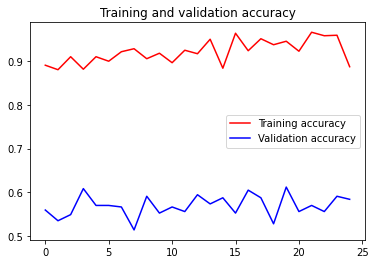

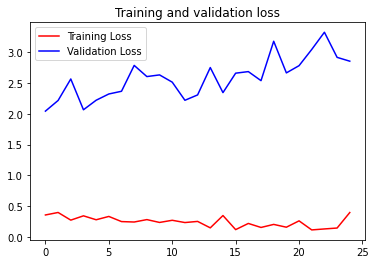

In [77]:
# Plot the chart for accuracy and loss on both training and validation

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [78]:
test_generator.reset()
pred = model.predict(test_generator, verbose=1)
predicted_class_indices = np.argmax(pred, axis=1)


labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]


filenames = test_generator.filenames
results = pd.DataFrame({"Filename":filenames,
                      "Class":predictions})
results.to_csv("/content/gdrive/MyDrive/DATASET/IMAGE/boat_type_classification_ai_challenge-dataset/submission.csv",index=False)

300/300 [==============================] - 4s 15ms/step


In [ ]:
# with image augmentation 56.11

## ResNet

In [155]:
res_net = tf.keras.applications.ResNet50(weights = 'imagenet', include_top = False, input_shape = (224, 224, 3)) 

In [156]:
res_net.trainable = False

In [158]:
output_layer = tf.keras.layers.Dense(9, activation='softmax')
x = layers.Flatten()(res_net.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(9, activation='softmax')(x)

model = tf.keras.models.Model(res_net.input, x)

In [160]:
#model.layers

In [161]:
#model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_6[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [165]:
model.compile(optimizer=RMSprop(lr=0.0001), loss='categorical_crossentropy', metrics=['acc'])

In [166]:
callbacks1 = [tf.keras.callbacks.TensorBoard(log_dir="/content/gdrive/MyDrive/DATASET/IMAGE/boat_type_classification_ai_challenge-dataset/logs", update_freq="batch")]

In [ ]:
model.fit_generator(train_generator,
    epochs=25,
    #steps_per_epoch=20,
    verbose=1,
    validation_data=validation_generator)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
14/14 [==============================] - 33s 2s/step - loss: 1.4377 - acc: 0.4965 - val_loss: 1.4734 - val_acc: 0.5455
Epoch 2/25
14/14 [==============================] - 28s 2s/step - loss: 1.3433 - acc: 0.5569 - val_loss: 1.4982 - val_acc: 0.5385
Epoch 3/25
14/14 [==============================] - 28s 2s/step - loss: 1.3346 - acc: 0.5216 - val_loss: 1.5050 - val_acc: 0.5210
Epoch 4/25
14/14 [==============================] - 28s 2s/step - loss: 1.3374 - acc: 0.5318 - val_loss: 1.4460 - val_acc: 0.5385
Epoch 5/25
14/14 [==============================] - 28s 2s/step - loss: 1.2659 - acc: 0.5706 - val_loss: 1.4874 - val_acc: 0.4930
Epoch 6/25
14/14 [==============================] - 28s 2s/step - loss: 1.3045 - acc: 0.5352 - val_loss: 1.4363 - val_acc: 0.4895
Epoch 7/25
14/14 [==============================] - 28s 2s/step - loss: 1.3164 - acc: 0.5332 - val_loss: 1.4498 - val_acc: 0.5245
Epoch 8/25
14/14 [==============================] - 28s 2s/step - loss: 1.3633 - acc: 0.51

In [ ]:
# Plot the chart for accuracy and loss on both training and validation

import matplotlib.pyplot as plt

acc = inc_history.history['acc']
val_acc = inc_history.history['val_acc']
loss = inc_history.history['loss']
val_loss = inc_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_generator.reset()
pred = model.predict(test_generator, verbose=1)
predicted_class_indices = np.argmax(pred, axis=1)


labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]


filenames = test_generator.filenames
results = pd.DataFrame({"Filename":filenames,
                      "Class":predictions})
results.to_csv("/content/gdrive/MyDrive/DATASET/IMAGE/boat_type_classification_ai_challenge-dataset/submission.csv",index=False)

# Inception_v3

In [182]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
base_model = InceptionV3(input_shape = (299, 299, 3), include_top = False, weights = 'imagenet')

In [183]:
for layer in base_model.layers:
    layer.trainable = False

In [184]:
x = layers.Flatten()(base_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(9, activation='softmax')(x)

model = tf.keras.models.Model(base_model.input, x)

#model.compile(optimizer = RMSprop(lr=0.0001), loss = 'categorical_crossentropy', metrics = ['acc'])
#model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'categorical_crossentropy', metrics = ['acc'])
model.compile(optimizer = tf.keras.optimizers.SGD(), loss = 'categorical_crossentropy', metrics = ['acc'])

In [185]:
inc_history = model.fit_generator(train_generator, 
                                  validation_data = validation_generator, 
                                  steps_per_epoch = 10, 
                                  verbose=1,
                                  epochs = 15,
                                  callbacks=[callbacks])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
10/10 [==============================] - 39s 3s/step - loss: 7.8282 - acc: 0.3235 - val_loss: 0.7384 - val_acc: 0.7517
Epoch 2/15
10/10 [==============================] - 30s 3s/step - loss: 0.7519 - acc: 0.7676 - val_loss: 0.5782 - val_acc: 0.8531
Epoch 3/15
10/10 [==============================] - 30s 3s/step - loss: 0.5311 - acc: 0.8271 - val_loss: 0.5828 - val_acc: 0.8147
Epoch 4/15
10/10 [==============================] - 30s 3s/step - loss: 0.4698 - acc: 0.8471 - val_loss: 0.4762 - val_acc: 0.8427
Epoch 5/15
10/10 [==============================] - 30s 3s/step - loss: 0.3423 - acc: 0.9040 - val_loss: 0.5663 - val_acc: 0.8182
Epoch 6/15
10/10 [==============================] - 30s 3s/step - loss: 0.2611 - acc: 0.9264 - val_loss: 0.4118 - val_acc: 0.8881
Epoch 7/15
10/10 [==============================] - 31s 3s/step - loss: 0.2278 - acc: 0.9324 - val_loss: 0.4092 - val_acc: 0.8636
Epoch 8/15
10/10 [==============================] - 30s 3s/step - loss: 0.1926 - acc: 0.93

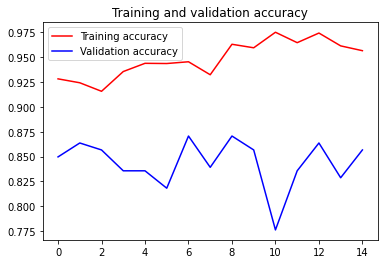

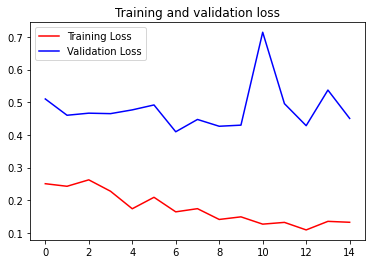

In [177]:
# Plot the chart for accuracy and loss on both training and validation

import matplotlib.pyplot as plt

acc = inc_history.history['acc']
val_acc = inc_history.history['val_acc']
loss = inc_history.history['loss']
val_loss = inc_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [179]:
test_generator.reset()
pred = model.predict(test_generator, verbose=1)
predicted_class_indices = np.argmax(pred, axis=1)


labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]


filenames = test_generator.filenames
results = pd.DataFrame({"Filename":filenames,
                      "Class":predictions})
results.to_csv("/content/gdrive/MyDrive/DATASET/IMAGE/boat_type_classification_ai_challenge-dataset/submission.csv",index=False)

300/300 [==============================] - 6s 21ms/step
